# Laptops Specification & Prices - Data Science project


### Import Libraries
All libraries are used for specific tasks including data preprocessing, visualization, transformation and evaluation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor 
import warnings
warnings.filterwarnings("ignore")

### Analyzing & understanding Data

In [2]:
import pandas as pd

dt = pd.read_csv('Laptop.csv')
 
dt.head()

,Unnamed: 0,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
0,0,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,Windows 11 Home,3.7,39040
1,1,DELL,Vostro,NaN,i5,11th,8.0,1 TB HDD,Windows 10 Home,3.6,50840
2,2,ASUS,VivoBook,15,i3,10th,8.0,512 GB SSD,Windows 11 Home,4.3,37940
3,3,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,256 GB SSD,4.4,44440
4,4,ASUS,TUF,Gaming,i5,10th,8.0,512 GB SSD,Windows 10 Home,4.5,57940


In [3]:
type(dt)

pandas.core.frame.DataFrame

In [4]:
dt.shape

(130, 11)

### Removing the rows with empty values since the number of empty rows are small. This is the best approach compared to replacing with mean or random values

In [51]:
dataTrain = dt.dropna()

In [6]:
dataTrain.shape 

(72, 11)

### Checking if null values are eliminated (Training set)

In [7]:
dataTrain.isnull().sum()

Unnamed: 0            0
Brand                 0
Model                 0
Series                0
Processor             0
Processor_Gen         0
RAM                   0
Hard_Disk_Capacity    0
OS                    0
Rating                0
Price                 0
dtype: int64

### Checking the data types to see if all the data is in correct format. All the data seems to be in their required format.


In [8]:
dataTrain.dtypes  ### checking the data type of every column

Unnamed: 0              int64
Brand                  object
Model                  object
Series                 object
Processor              object
Processor_Gen          object
RAM                   float64
Hard_Disk_Capacity     object
OS                     object
Rating                float64
Price                   int64
dtype: object

### Checking the correlation between the numerical features

### EDA (Exploratory Data Analysis)
### Visualizations are used to understand the relationship between the target variable and the features, in addition to correlation coefficient and p-value. 
### The visuals include heatmap, scatterplot,boxplot etc.
### 

### Heat map

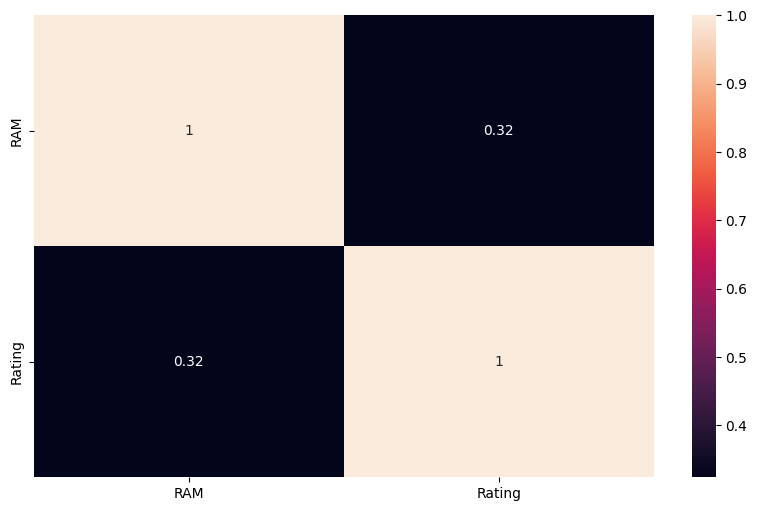

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
dtype_df = dataTrain.dtypes
float_cols = dtype_df.iloc[(dtype_df=='float64').values].index
corr = dataTrain[float_cols].corr()  

sns.heatmap(corr,annot=True)
plt.show()

### From the heatmap, it is observed that 'Rating' is the best feature among all the features with numerical data


In [10]:
dataTrain.describe()  


,Unnamed: 0,RAM,Rating,Price
count,72.000000,72.000000,72.000000,72.000000
mean,61.597222,8.833333,4.291667,52474.763889
std,36.618959,3.484372,0.285692,17882.937326
min,2.000000,4.000000,2.900000,17640.000000
25%,27.750000,8.000000,4.200000,39690.000000
50%,62.500000,8.000000,4.300000,49940.000000
75%,93.750000,8.000000,4.500000,60071.750000
max,129.000000,16.000000,4.800000,114940.000000


#### A descriptive analysis to check incorrect entries and anormalies. This is also used to give an overview of the numerical data. It is observed that most of the data has no incorrect entries.

1. Count: The number of values in the dataframe.
2. Mean: The arithmetic mean or average of the values.
3. Standard Deviation (std): A measure of the dispersion or spread of the values.
4. Minimum: The minimum (smallest) value in each column.
5. 25th Percentile (25%): The value below which 25% of the data falls (1st quartile). Means 25% of the entire data falls under the value 158000 for odometer_value
6. 50th Percentile (50%): The median or value below which 50% of the data falls (2nd quartile).
7. 75th Percentile (75%): The value below which 75% of the data falls (3rd quartile).
8. Maximum: The maximum (largest) value in the Series.

**********************

Looking at the "minimum price", 1 USD is found.
This could be a wrong entry (or an outlier)


In [11]:
dataTrain.describe()  ### now the minimum price is 500 USD

,Unnamed: 0,RAM,Rating,Price
count,72.000000,72.000000,72.000000,72.000000
mean,61.597222,8.833333,4.291667,52474.763889
std,36.618959,3.484372,0.285692,17882.937326
min,2.000000,4.000000,2.900000,17640.000000
25%,27.750000,8.000000,4.200000,39690.000000
50%,62.500000,8.000000,4.300000,49940.000000
75%,93.750000,8.000000,4.500000,60071.750000
max,129.000000,16.000000,4.800000,114940.000000


### Find the distribution of the price in the entire dataset
### using "bins"  -- Technique applied is called data binning

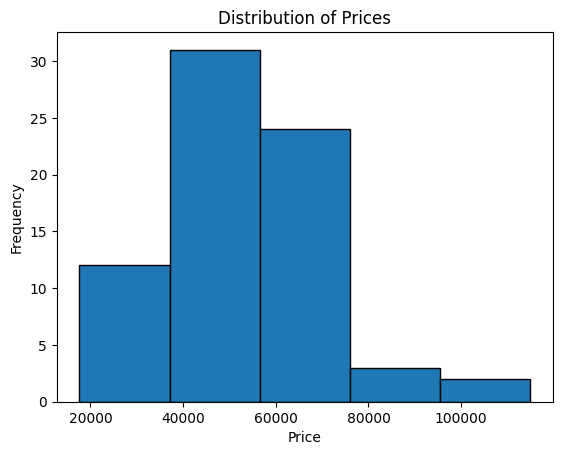

In [12]:
import matplotlib.pyplot as plt

dataTrain['Price'].plot(kind = 'hist', bins = 5, edgecolor='black')   ### 5 bins are used
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

### From the histogram, it is understood that majority of the Laptops samples are of lower prices


In [13]:
dataTrain.describe(include = 'object') ###summary statistics for categorical values

,Brand,Model,Series,Processor,Processor_Gen,Hard_Disk_Capacity,OS
count,72,72,72,72,72,72,72
unique,8,25,26,16,9,7,7
top,ASUS,IdeaPad,3,i3,11th,512 GB SSD,Windows 10 Home
freq,27,15,17,23,31,34,36


### Regression/scatter Plot
 This regression plot show the relation between *rating* and *price*. A slight negative correlation is observed
 whaich shows that price is being affected by the change in rating value.

<Axes: xlabel='Rating', ylabel='Price'>

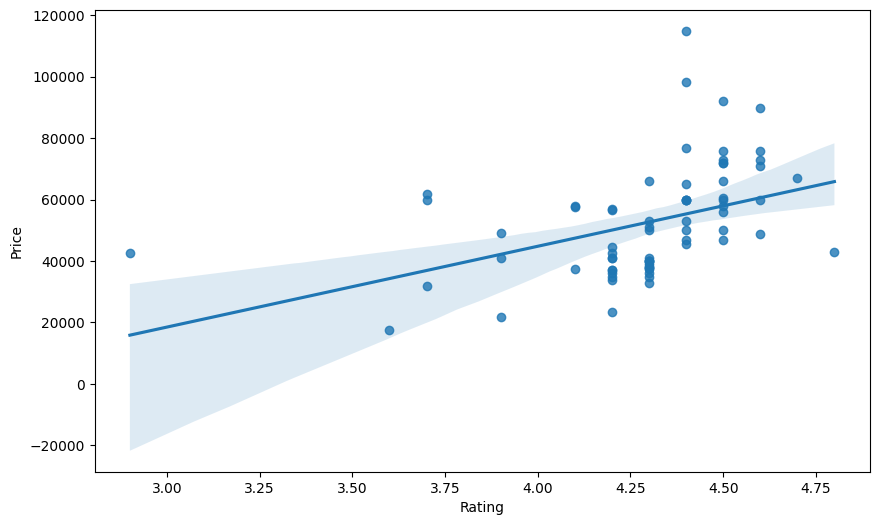

In [14]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.regplot(x="Rating", y="Price", data=dataTrain)

### As observed in the plot, a *positive correlation* is observed

In [15]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(dataTrain['Rating'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.4201508073760113  with a P-value of P = 0.0002385000413017386


-- Pearson corr coeff of -0.42 is obtained along with a p-value of 0. 

-- The Pearson Correlation Coefficient (r) is a measure of the linear relationship between two variables. It can take values between -1 and 1
 
-- If r is close to 1, it indicates a strong positive linear relationship. This means that as one variable increases, the other variable tends to increase as well.
### 
-- If r is close to -1, it indicates a strong negative linear relationship. This means that as one variable increases, the other variable tends to decrease.
### 
-- If r is close to 0, it suggests a weak or no linear relationship. In other words, the variables are not strongly correlated.
### 
-- Here, the Pearson Correlation Coefficient is approximately -0.420, which is closer to -1 than to 0. This indicates a moderate negative linear relationship between the two variables being correlated.
### 
-- The p-value (probablity) is used to determine the statistical significance of the correlation. In other words, how confidently one can say a feature is correlated to the target ariable.
### 
#### "IMPORTANT:" A P-value less than 0.05 (commonly used significance level) suggests that the correlation is statistically significant and hence reject the Null hypothesis. 
### 
#### What is my null hypothesis? 
#### H0: The feature variable is correlated to a target variable. 
### 
#### Very important: A P-value of 0.0 means (more confidently say the feature is correlated to target) and that the correlation is extremely unlikely to have occurred by random chance, indicating strong statistical significance.
### 
-- The p value here (that corresponds to rating) confirms strong correlation, hence this feature is a critical feature to the prediction of used laptop price.

The regression plot below shows a relationship between ram capacity that the laptop is having and the price of the laptop. A positive 
correlation is observed between the two variables. This shows that the price increases with increase of the capacity of the Ram memory for the laptop.


<Axes: xlabel='RAM', ylabel='Price'>

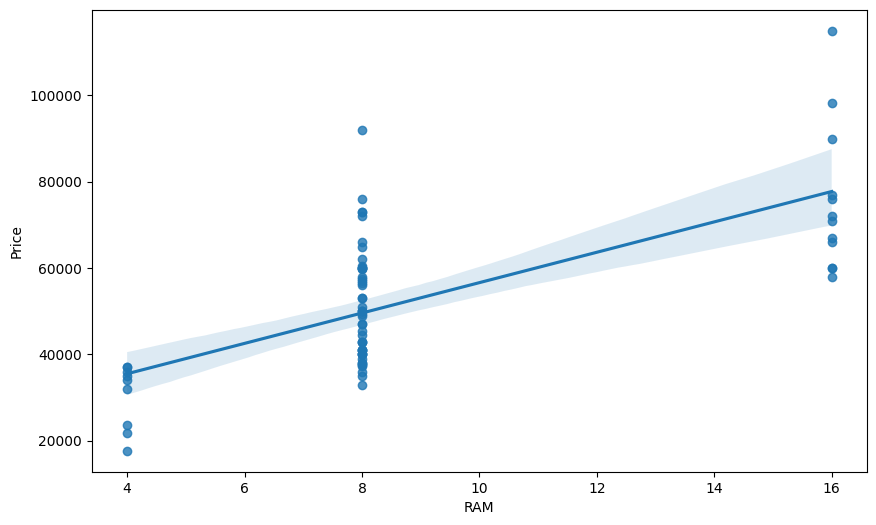

In [16]:
plt.figure(figsize=(10,6))
sns.regplot(x="RAM", y="Price", data=dataTrain)

### As observed above, a high positive correlation of 0.7 is calculated along with the p-value of 0. This indicates that the correlation between the variables is significant Ram capacity feature can be used for prediction.

In [17]:
pearson_coef, p_value = stats.pearsonr(dataTrain['RAM'], dataTrain['Price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.685543506073811  with a P-value of P = 3.060283924464423e-11


### Box Plot
### These plots are used for categorical data to determine the importance of features for prediction. 

### In the given plot below, it is observed that the price range vary for Processor Generation. This indicates the categories can vary with price hence feature can be used for prediction..


<Axes: xlabel='Processor_Gen', ylabel='Price'>

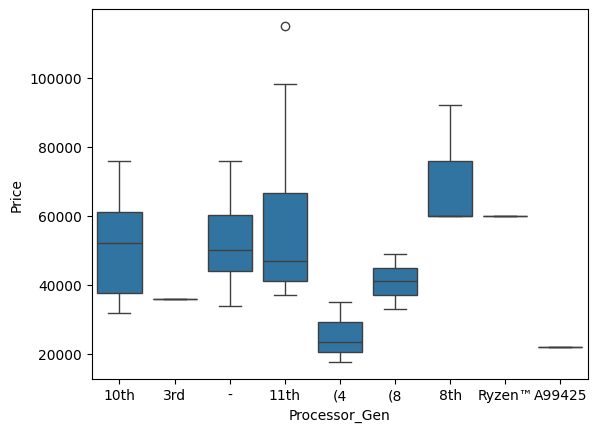

In [18]:
sns.boxplot(x="Processor_Gen", y="Price", data=dataTrain)

### The box plot shows how prices vary based on different models. This shows that model can be used as a feature for price prediction.


### Using Exploratory data analysis, few features can be dropped because they had no impact on the price prediction. Those features are removed with the function below.(Training set)

In [19]:
dataTrain.drop(['Series', 'OS'], axis = 1, inplace = True)


In [20]:
dataTrain.shape

(72, 9)

### Data Transformation
### Label encoding of categorical features in the training set. Label encoding is converting categorical data into numerical data since the model cant understand textual data.

### ----Data Preparation--------

In [21]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
dataTrain.Brand = labelencoder.fit_transform(dataTrain.Brand)
dataTrain.Model = labelencoder.fit_transform(dataTrain.Model)
dataTrain.Processor = labelencoder.fit_transform(dataTrain.Processor)
dataTrain.RAM = labelencoder.fit_transform(dataTrain.RAM)
dataTrain.Processor_Gen = labelencoder.fit_transform(dataTrain.Processor_Gen)
dataTrain.Hard_Disk_Capacity = labelencoder.fit_transform(dataTrain.Hard_Disk_Capacity)

dataTrain.Rating = labelencoder.fit_transform(dataTrain.Rating)
dataTrain.Price = labelencoder.fit_transform(dataTrain.Price)

### Checking on the remaining features and if label encoding is applied to all categorical features (Training set).

In [22]:
dataTrain.head(10)

,Unnamed: 0,Brand,Model,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,Rating,Price
2,2,0,21,13,3,1,5,6,12
4,4,0,19,14,3,1,5,8,31
5,5,0,16,2,5,1,3,6,7
6,6,1,10,1,2,0,3,5,5
8,8,3,8,13,3,1,0,4,10
11,11,3,8,13,4,1,3,5,15
12,12,3,8,13,3,1,3,6,12
13,13,1,10,2,2,1,3,6,9
14,14,2,16,2,2,1,3,6,13
15,15,3,8,13,4,1,3,6,15


#### --Data Transfornation (normalization) ----
#### z-score used for scaling down the features between the range of -1 and 1. This helps the model make better prediction as it is easy to understand. The scaling is applied to the training and testing set  

In [23]:
# Calculate the z-score from with scipy
import scipy.stats as stats
dataTrain = stats.zscore(dataTrain)

In [24]:
dataTrain

,Unnamed: 0,Brand,Model,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,Rating,Price
2,-1.638918,-1.039916,1.217350,0.496753,-0.213643,-0.077382,0.844045,-0.086645,-0.885764
4,-1.583918,-1.039916,0.909268,0.707143,-0.213643,-0.077382,0.844045,0.873120,0.533118
5,-1.556418,-1.039916,0.447146,-1.817533,1.184745,-0.077382,-0.194780,-0.086645,-1.259155
6,-1.528918,-0.481155,-0.477098,-2.027923,-0.912836,-1.934558,-0.194780,-0.566528,-1.408511
8,-1.473918,0.636367,-0.785180,0.496753,-0.213643,-0.077382,-1.753017,-1.046411,-1.035120
...,...,...,...,...,...,...,...,...,...
115,1.468571,0.636367,-0.785180,0.496753,0.485551,-0.077382,-0.194780,-0.086645,-0.736408
116,1.496071,0.636367,-2.017506,0.075974,2.583133,-1.934558,-1.753017,-1.526294,-1.707223
118,1.551071,-1.039916,-1.401343,-2.238312,-2.311224,-1.934558,0.324633,-2.486059,-1.781901
128,1.826070,-1.039916,1.371390,0.496753,0.485551,-0.077382,-1.753017,-2.965942,-0.512374


#### Dividing the data for training and testing accordingly. X takes the all features while Y takes the target variable

#### We have 9 actual columns [0-8 index]; 9 are predictor variables and 1 is the target variable


In [25]:
x_train=dataTrain.iloc[:,0:8]
y_train=dataTrain.iloc[:,7]

In [26]:
x_train.head()

,Unnamed: 0,Brand,Model,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,Rating
2,-1.638918,-1.039916,1.217350,0.496753,-0.213643,-0.077382,0.844045,-0.086645
4,-1.583918,-1.039916,0.909268,0.707143,-0.213643,-0.077382,0.844045,0.873120
5,-1.556418,-1.039916,0.447146,-1.817533,1.184745,-0.077382,-0.194780,-0.086645
6,-1.528918,-0.481155,-0.477098,-2.027923,-0.912836,-1.934558,-0.194780,-0.566528
8,-1.473918,0.636367,-0.785180,0.496753,-0.213643,-0.077382,-1.753017,-1.046411


In [27]:
y_train.head()

2   -0.086645
4    0.873120
5   -0.086645
6   -0.566528
8   -1.046411
Name: Rating, dtype: float64

In [28]:
# Split single data into train
# importing train test split from sklearn
from sklearn.model_selection import train_test_split

# spliting the data
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.33, random_state = 42)

In [29]:
x_train.shape

(48, 8)

In [30]:
x_test.shape

(24, 8)

In [31]:
y_train.shape

(48,)

In [32]:
y_test.shape

(24,)

### Fit Model
### Multiple Linear Regression
### Calling multiple linear regression model and fitting the training set

In [33]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model_mlr = model.fit(x_train,y_train)

#### Making price prediction using the testing set (Fit to MLR)


In [34]:
y_pred1 = model_mlr.predict(x_test)

In [35]:

y_test[2]

-0.08664548924621927

In [36]:

y_pred1[2]

-0.5665281989175874

#### y_test[0]   and   y_pred1[0]   have different values.. In other words, there is error

### MLR Evaluation
 
### Calculating the Mean Square Error for MLR model

In [37]:
mse1 = mean_squared_error(y_test, y_pred1)
print('The mean square error for Multiple Linear Regression: ', mse1)

The mean square error for Multiple Linear Regression:  1.6574232113072488e-31


##### Calculating the Mean Absolute Error for MLR model

In [38]:
mae1= mean_absolute_error(y_test, y_pred1)
print('The mean absolute error for Multiple Linear Regression: ', mae1)

The mean absolute error for Multiple Linear Regression:  3.3769283665681843e-16


### Random Forest Regressor (checking other Models)
### Calling the random forest model and fitting the training data

In [39]:
rf = RandomForestRegressor()
model_rf = rf.fit(x_train,y_train)

##### Prediction of laptop prices using the testing data

In [40]:
y_pred2 = model_rf.predict(x_test)

### Random Forest Evaluation 

##### Calculating the Mean Square Error for Random Forest Model (Lowest MSE value)

In [41]:
mse2 = mean_squared_error(y_test, y_pred2)
print('The mean square error of price and predicted value is: ', mse2)

The mean square error of price and predicted value is:  0.046744507129847596


#### Calculating the Mean Absolute Error for Random Forest Model (Lowest Mean Absolute Error)

In [42]:
mae2= mean_absolute_error(y_test, y_pred2)
print('The mean absolute error of price and predicted value is: ', mae2)

The mean absolute error of price and predicted value is:  0.1195707751597831


### LASSO Model 
### Calling the model and fitting the training data

In [43]:
LassoModel = Lasso()
model_lm = LassoModel.fit(x_train,y_train)

#### Price prediction uisng testing data

In [44]:
y_pred3 = model_lm.predict(x_test)

### LASSO Evaluation  (checking another model)

### Mean Absolute Error for LASSO Model

In [45]:
mae3= mean_absolute_error(y_test, y_pred3)
print('The mean absolute error of price and predicted value is: ', mae3)

The mean absolute error of price and predicted value is:  0.883117486548005


#### Mean Squared Error for the LASSO Model

In [46]:
mse3 = mean_squared_error(y_test, y_pred3)
print('The mean square error of price and predicted value is: ', mse3)

The mean square error of price and predicted value is:  1.1611323353027407


In [47]:
scores = [('MLR', mae1),
          ('Random Forest', mae2),
          ('LASSO', mae3)
         ]

In [48]:
mae = pd.DataFrame(data = scores, columns=['Model', 'MAE Score'])
mae

,Model,MAE Score
0,MLR,3.376928e-16
1,Random Forest,1.195708e-01
2,LASSO,8.831175e-01


Text(0, 0.5, 'Mean Absolute Error')

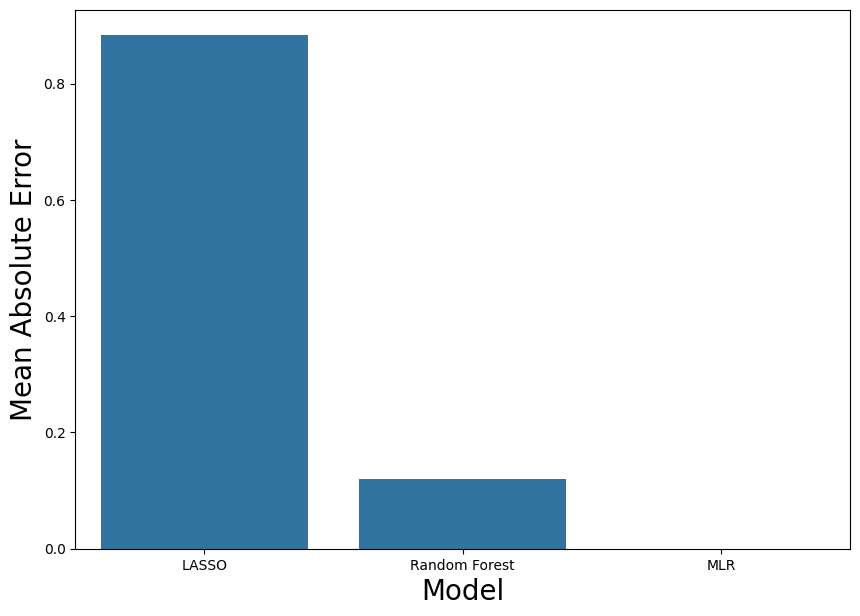

In [50]:
mae.sort_values(by=(['MAE Score']), ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(10,7))
sns.barplot(x = mae['Model'], y=mae['MAE Score'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('Mean Absolute Error', size=20)

### Based on the MAE, it is concluded that the LASSO is the best regression model for predicting the laptop price based on the 9 predictor variables